**Launch of  a new checkout process for online bakery “Sweet Bytes”**

---



# Calculating the Required Sample Size

In [2]:
from statsmodels.stats.power import TTestIndPower
import numpy as np

# Setting up Parameters for the checkout process
current_conversion_rate = 0.05  # Current conversion rate
new_conversion_rate = 0.07      # Expected new conversion rate

# Calculating effect size
effect_size = (new_conversion_rate - current_conversion_rate) / np.sqrt(
    (current_conversion_rate * (1 - current_conversion_rate) + new_conversion_rate * (1 - new_conversion_rate)) / 2
)

analysis = TTestIndPower()

# Calculating required sample size per group
sample_size = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, ratio=1)

print(f"Required sample size per group: {sample_size:.2f}")



Required sample size per group: 2210.42


# Analyze the Impact of Effect Size:

In [7]:
from statsmodels.stats.power import TTestIndPower

analysis = TTestIndPower()

# effect sizes to analyze
effect_sizes = [0.1, 0.2, 0.3, 0.4]

# Calculating required sample size for each effect size
sample_sizes = {es: analysis.solve_power(effect_size=es, alpha=0.05, power=0.8, ratio=1) for es in effect_sizes}


for es, sample_size in sample_sizes.items():
    print(f"Effect Size = {es:.1f}: Required Sample Size Per Group = {sample_size:.2f}")


Effect Size = 0.1: Required Sample Size Per Group = 1570.73
Effect Size = 0.2: Required Sample Size Per Group = 393.41
Effect Size = 0.3: Required Sample Size Per Group = 175.38
Effect Size = 0.4: Required Sample Size Per Group = 99.08


As the effect size increases, the required sample size decreases significantly.
Larger effect sizes (e.g., 0.4) need fewer participants to detect a difference, while smaller effect sizes (e.g., 0.1) require many more participants to achieve the same statistical power.

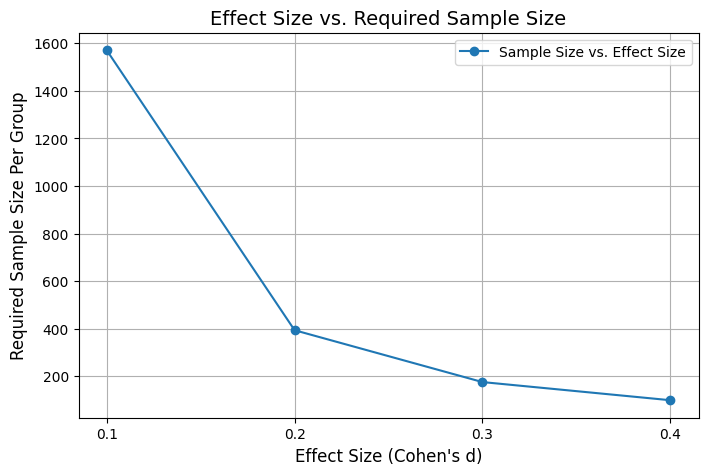

In [8]:
import matplotlib.pyplot as plt
sample_sizes_chart = [analysis.solve_power(effect_size=es, alpha=0.05, power=0.8, ratio=1) for es in effect_sizes]

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(effect_sizes, sample_sizes_chart, marker='o', linestyle='-', label='Sample Size vs. Effect Size')
plt.title('Effect Size vs. Required Sample Size', fontsize=14)
plt.xlabel('Effect Size (Cohen\'s d)', fontsize=12)
plt.ylabel('Required Sample Size Per Group', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.xticks(effect_sizes)
plt.show()



Why Does This Happen?
1. Signal-to-Noise Ratio:
The effect size measures the magnitude of the difference between two groups relative to variability within the data.
A large effect size (e.g., 0.4) represents a clear difference between groups, making it easier to detect with fewer participants.
A small effect size (e.g., 0.1) represents a subtle difference that is harder to distinguish from random noise, requiring a larger sample to increase confidence in the result.

2. Statistical Power:
Statistical power is the probability of detecting an effect if it exists. When the effect size is small, more data is needed to reach the desired power (e.g., 80%).
With larger effect sizes, the power increases naturally, requiring fewer participants to achieve the same confidence.

# Explain the Relationship:

Testing is like baking a batch of cookies:

If you bake just one cookie, it’s hard to tell if the whole batch will taste good (small sample size).
If you bake 1,000 cookies, you’re wasting dough and time (too large a sample size).
The key is baking just enough cookies to be confident they’ll be a hit with customers!